<a href="https://colab.research.google.com/github/msmankiratsingh/msmankiratsingh/blob/main/wine_data_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("The libraries are finally uploaded sucessfully")

The libraries are finally uploaded sucessfully


In [ ]:
red = pd.read_csv("/winequality-red.csv", sep=';')
white = pd.read_csv("/winequality-white.csv", sep=';')

In [ ]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bound sulfur,acidity_ratio,so2_ratio,total_acidity
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,85.219255,0.047612,0.286768,7.873606
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,45.422872,0.022773,0.124645,1.388024
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,3.000000,0.011111,0.022727,4.130000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,55.000000,0.032203,0.202073,7.020000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,86.000000,0.041667,0.269767,7.600000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,116.000000,0.056522,0.348837,8.380000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,331.000000,0.208000,0.857143,17.045000


In [ ]:
red['type'] = 'red'
white['type'] = 'white'
wines = pd.concat([red, white], ignore_index=True)


In [ ]:
wines['bound sulfur'] = wines['total sulfur dioxide'] - wines['free sulfur dioxide']

In [ ]:
wines['acidity_ratio'] = wines['volatile acidity'] / (wines['fixed acidity'] + 0.00001)

In [ ]:
wines['so2_ratio'] = wines['free sulfur dioxide'] / (wines['total sulfur dioxide'] + 0.00001)

In [ ]:
wines['total_acidity'] = wines['fixed acidity'] + wines['volatile acidity'] + wines['citric acid']

In [ ]:
print("New data shape:", wines.shape)

New data shape: (6497, 17)


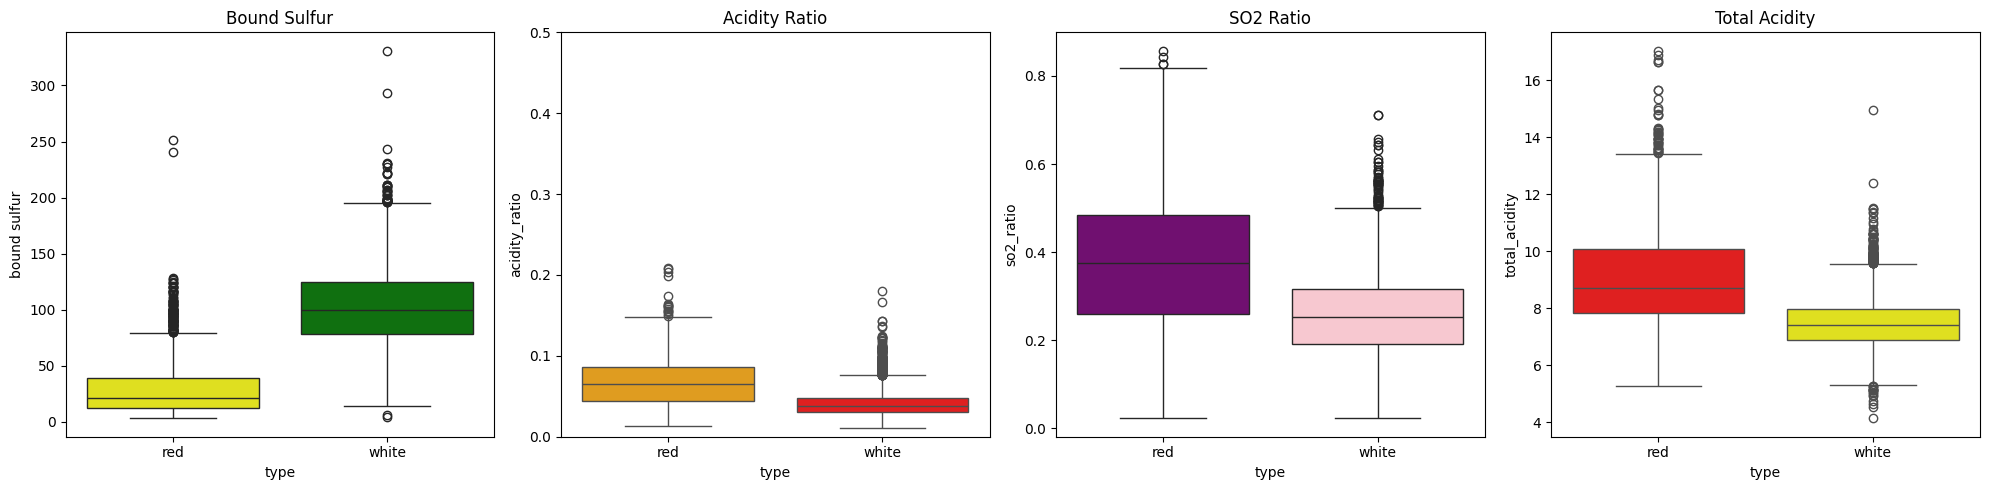

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,bound sulfur,acidity_ratio,so2_ratio,total_acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,23.0,0.094594,0.323529,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,42.0,0.112820,0.373134,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,39.0,0.097436,0.277778,8.60
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,43.0,0.025000,0.283333,12.04
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,23.0,0.094594,0.323529,8.10


In [ ]:
# Here is the code for the plotting
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(x='type', y='bound sulfur', data=wines, ax=axes[0], hue='type', palette=['yellow', 'green'], legend=False)
axes[0].set_title('Bound Sulfur')

sns.boxplot(x='type', y='acidity_ratio', data=wines, ax=axes[1], hue='type', palette=['orange', 'red'], legend=False)
axes[1].set_title('Acidity Ratio')
axes[1].set_ylim(0, 0.5)

sns.boxplot(x='type', y='so2_ratio', data=wines, ax=axes[2], hue='type', palette=['purple', 'pink'], legend=False)
axes[2].set_title('SO2 Ratio')

sns.boxplot(x='type', y='total_acidity', data=wines, ax=axes[3], hue='type', palette=['red', 'yellow'], legend=False)
axes[3].set_title('Total Acidity')

plt.tight_layout()
plt.show()

wines.head()

In [ ]:
#HEAT MAP
columns_to_check = ['bound sulfur', 'acidity_ratio', 'so2_ratio', 'total_acidity', 'quality']

In [ ]:
features_df = wines[columns_to_check]
correlation_matrix = features_df.corr()

In [ ]:
print("Correlations with Wine Quality:")
print(correlation_matrix['quality'].sort_values(ascending=False))

Correlations with Wine Quality:
quality          1.000000
so2_ratio        0.116287
bound sulfur    -0.073171
total_acidity   -0.094240
acidity_ratio   -0.232446
Name: quality, dtype: float64


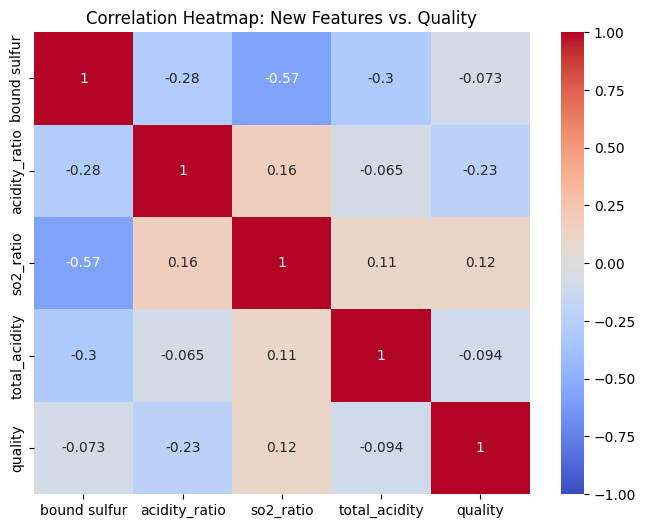

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap: New Features vs. Quality")
plt.show()

In [ ]:
# Multiple regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("Starting The Multiple Linear Regression for the Quality")


# X = Ingredients ( here we used the all the 11 features realted to the chemicals )
# y = Target ( here the quality score what we to predict)

Ingredients = wines.drop(['type', 'quality'], axis=1)
Score_of_the_Quality= wines['quality']

# Split Data for Training and Testing
Ingredients_train, Ingredients_test, Score_of_the_Quality_train, Score_of_the_Quality_test = train_test_split(Ingredients,Score_of_the_Quality,test_size=0.2, random_state=42)
print("Data split:", len(Ingredients_train), "training wines", len(Ingredients_test), "testing wines.")

# Train the Model
my_model = LinearRegression()
my_model.fit(Ingredients_train, Score_of_the_Quality_train)
print("Model Created.")

# Evaluate the Model
predicetd_scores = my_model.predict(Ingredients_test)
grade_model = r2_score(Score_of_the_Quality_test, predicetd_scores)


final_grade_percent = round(grade_model * 100, 1)
print("R-squared (R2) Grade:", final_grade_percent, "%")

print("\nThis means our formula can explain", final_grade_percent, "% of what makes a wine good or bad.")

# The Formula for the  Quality (Coefficients
print("\n The Formula for Quality")

# Here i am getting the coefficients (the "numbers" in the formula)
formula_numbers = my_model.coef_

# Geting the names of the features
Ingredient_names = Ingredients.columns

# Putting the formula into a simple table so we can read it
Formula_table = pd.DataFrame(data=formula_numbers, index = Ingredient_names, columns=['Impact on Quality'])

# Sort the table to see the biggest factors first
Sorted_Formula_table = Formula_table.sort_values(by='Impact on Quality', ascending=False)

# Display the final formula
print("Here is the 'Formula' the model found:")
display(Sorted_Formula_table)


Starting The Multiple Linear Regression for the Quality
Data split: 5197 training wines 1300 testing wines.
Model Created.
R-squared (R2) Grade: 27.5 %

This means our formula can explain 27.5 % of what makes a wine good or bad.

 The Formula for Quality
Here is the 'Formula' the model found:


,Impact on Quality
so2_ratio,0.847005
sulphates,0.805621
pH,0.515456
alcohol,0.258581
residual sugar,0.050439
volatile acidity,0.042282
fixed acidity,0.034004
free sulfur dioxide,-0.000128
bound sulfur,-0.000256
total sulfur dioxide,-0.000384


Plotting The Formula For the Quality


/tmp/ipython-input-3076010033.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Impact on Quality',y = Sorted_Formula_table.index, data = Sorted_Formula_table, palette = colors)


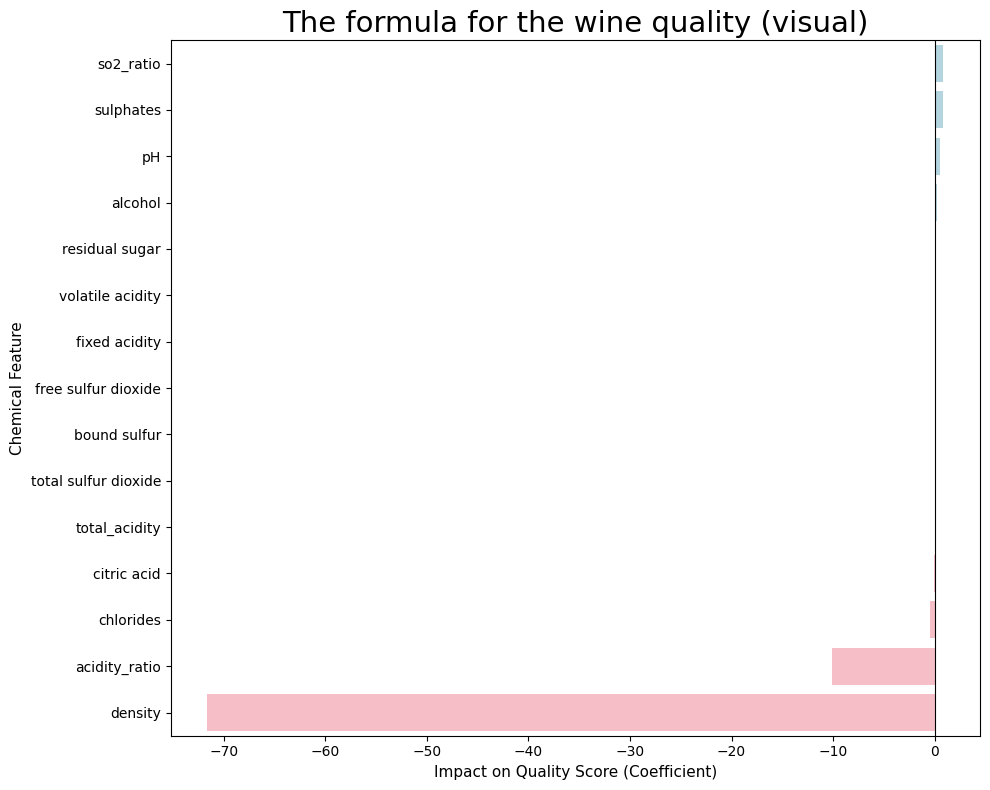

In [ ]:
# --- Plotting Feature Importance from Regression ---

import matplotlib.pyplot as plt
import seaborn as sns


print("Plotting The Formula For the Quality")

# Create a color list: green for positive, red for negative
colors = ['lightblue' if c > 0 else 'lightpink' for c in Sorted_Formula_table['Impact on Quality']]

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x= 'Impact on Quality',y = Sorted_Formula_table.index, data = Sorted_Formula_table, palette = colors)
plt.title('The formula for the wine quality (visual)', fontsize=21)
plt.xlabel('Impact on Quality Score (Coefficient)', fontsize=11)
plt.ylabel('Chemical Feature', fontsize=11)
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()